In [199]:
import pandas as pd # 판다스 모듈 갖고오기
import numpy as np # 넘피 모듈 갖고오기
import matplotlib.pyplot as plt # pyplot 모듈 갖고오기
import matplotlib as mpl # matplotlib 패키지 갖고오기
import matplotlib.font_manager as fm # font_manager 갖고오기
import datetime as dt # datatime 모듈 갖고오기

import SampleData as d # SampleData.py의 변수 사용


# font_path=r'c:\WINDOWS\Fonts\NotoSansKR-Bold.ttf' # 한글 출력 설정
# font_path = r'C:\Users\KDP-26\AppData\Local\Microsoft\Windows\Fonts\'
font_path = r'C:\Windows\Fonts\gulim.ttc'
myFont=fm.FontProperties(fname=font_path).get_name()
mpl.rc('font',family=myFont)

## 각 국가별 일본 무역량과 일본 애니 인기의 상관관계
### 1. 전체 애니 시청자 국가 분포도 시각화 + 단순 시청자 수와 인구 대비 시청자 수 표시 <hr>
### 2. 오타쿠 국가 분포도 시각화 + 단순 오타쿠 수와 인구 대비 오타쿠 표시 <hr>
### 3. 수출국 순위와 인구 대비 전체 애니 시청자 수, 오타쿠 수 상관관계 분석 <hr>
### 4. 수출국 순위와 단순 애니 시청자 수, 오타쿠 수 상관관계 분석 <hr>


## 1. 전체 애니 시청자 국가 분포도 시각화 + 단순 시청자 수와 인구 대비 시청자 수 표시 <hr>

In [239]:
# 데이터 로드
d.user_details

,Location,Completed
0,California,233.0
1,"Oslo, Norway",137.0
2,"Melbourne, Australia",636.0
5,"Bergen, Norway",94.0
6,Canada,298.0
...,...,...
731266,"Palm Desert, CA",142.0
731269,"Toronto, Ontario",554.0
731270,"Moscow, Russia",77.0
731277,"Davis, California",409.0


In [201]:
# 나는 Location 과 Completed 컬럼만 사용한다.
d.user_details=d.user_details[['Location','Completed']]
d.user_details

,Location,Completed
0,California,233.0
1,"Oslo, Norway",137.0
2,"Melbourne, Australia",636.0
5,"Bergen, Norway",94.0
6,Canada,298.0
...,...,...
731266,"Palm Desert, CA",142.0
731269,"Toronto, Ontario",554.0
731270,"Moscow, Russia",77.0
731277,"Davis, California",409.0


In [202]:
# Location 결측값 제거
d.user_details=d.user_details.dropna()
d.user_details

,Location,Completed
0,California,233.0
1,"Oslo, Norway",137.0
2,"Melbourne, Australia",636.0
5,"Bergen, Norway",94.0
6,Canada,298.0
...,...,...
731266,"Palm Desert, CA",142.0
731269,"Toronto, Ontario",554.0
731270,"Moscow, Russia",77.0
731277,"Davis, California",409.0


In [203]:
# 전세계 도시 이름 데이터 불러오기
d.city_names_file = '../Data/World_cities.csv'
d.city_names = pd.read_csv(d.city_names_file)
d.city_names

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000.0,1392685764
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000.0,1360771077
2,Delhi,Delhi,28.6100,77.2300,India,IN,IND,Delhi,admin,32226000.0,1356872604
3,Guangzhou,Guangzhou,23.1300,113.2600,China,CN,CHN,Guangdong,admin,26940000.0,1156237133
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000.0,1356226629
...,...,...,...,...,...,...,...,...,...,...,...
44686,Numto,Numto,63.6667,71.3333,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra,NaN,10.0,1643985006
44687,Nord,Nord,81.7166,-17.8000,Greenland,GL,GRL,NaN,NaN,10.0,1304217709
44688,Timmiarmiut,Timmiarmiut,62.5333,-42.2167,Greenland,GL,GRL,Kujalleq,NaN,10.0,1304206491
44689,San Rafael,San Rafael,-16.7795,-60.6799,Bolivia,BO,BOL,Santa Cruz,NaN,NaN,1068007388


In [204]:
# city, city_ascii, country, iso2, iso3, admin_name 컬럼 추출
d.city_names = d.city_names[['city','city_ascii','country','iso2','iso3','admin_name']]
d.city_names

,city,city_ascii,country,iso2,iso3,admin_name
0,Tokyo,Tokyo,Japan,JP,JPN,Tōkyō
1,Jakarta,Jakarta,Indonesia,ID,IDN,Jakarta
2,Delhi,Delhi,India,IN,IND,Delhi
3,Guangzhou,Guangzhou,China,CN,CHN,Guangdong
4,Mumbai,Mumbai,India,IN,IND,Mahārāshtra
...,...,...,...,...,...,...
44686,Numto,Numto,Russia,RU,RUS,Khanty-Mansiyskiy Avtonomnyy Okrug-Yugra
44687,Nord,Nord,Greenland,GL,GRL,NaN
44688,Timmiarmiut,Timmiarmiut,Greenland,GL,GRL,Kujalleq
44689,San Rafael,San Rafael,Bolivia,BO,BOL,Santa Cruz


In [205]:
# city 컬럼 알파벳 순으로 정렬
d.city_names = d.city_names.sort_values(by='city')
d.city_names

,city,city_ascii,country,iso2,iso3,admin_name
2689,A Coruña,A Coruna,Spain,ES,ESP,Galicia
15026,A Yun Pa,A Yun Pa,Vietnam,VN,VNM,Gia Lai
28671,Aabenraa,Aabenraa,Denmark,DK,DNK,Syddanmark
2698,Aachen,Aachen,Germany,DE,DEU,North Rhine-Westphalia
41770,Aadorf,Aadorf,Switzerland,CH,CHE,Thurgau
...,...,...,...,...,...,...
31243,’Tlat Bni Oukil,'Tlat Bni Oukil,Morocco,MA,MAR,Béni Mellal-Khénifra
41880,’s-Gravendeel,'s-Gravendeel,Netherlands,NL,NLD,Zuid-Holland
23669,’s-Gravenzande,'s-Gravenzande,Netherlands,NL,NLD,Zuid-Holland
42869,’s-Heerenberg,'s-Heerenberg,Netherlands,NL,NLD,Gelderland


In [206]:
# Location 컬럼에 숫자 들어간 데이터 삭제
d.user_details=d.user_details[~d.user_details['Location'].str.contains('\d')]
d.user_details

,Location,Completed
0,California,233.0
1,"Oslo, Norway",137.0
2,"Melbourne, Australia",636.0
5,"Bergen, Norway",94.0
6,Canada,298.0
...,...,...
731266,"Palm Desert, CA",142.0
731269,"Toronto, Ontario",554.0
731270,"Moscow, Russia",77.0
731277,"Davis, California",409.0


In [207]:
# 이거 왜 했더라..
d.user_details[d.user_details['Location'].str.isalpha()]

,Location,Completed
0,California,233.0
6,Canada,298.0
19,Canada,57.0
20,Latvia,114.0
31,UAE,104.0
...,...,...
731227,Tunisia,585.0
731232,Lyon,454.0
731241,Kuwait,199.0
731249,Canada,279.0


In [208]:
# 고유값만 추출
d.user_details['Location'].unique()

array(['California', 'Oslo, Norway', 'Melbourne, Australia', ...,
       'Coventry England', 'mansoura', 'Newport Coast, California'],
      dtype=object)

In [209]:
# 추출한 고유값(도시 이름, 국가이름)으로 이상값 제거
Mask=d.user_details['Location'].isin(list(d.user_details['Location'].unique()))
d.user_details=d.user_details[Mask]
# Location 종류별로 카운트
d.user_details['Location'].value_counts()

Location
Poland                       2458
Germany                      1706
Canada                       1693
California                   1506
Brazil                       1056
                             ... 
Oconomowoc, Wisconsin           1
clifton ohio                    1
California, America!            1
With Train ~ ♥                  1
Newport Coast, California       1
Name: count, Length: 51754, dtype: int64

In [210]:
# 전처리 된 d.user_details
d.user_details

,Location,Completed
0,California,233.0
1,"Oslo, Norway",137.0
2,"Melbourne, Australia",636.0
5,"Bergen, Norway",94.0
6,Canada,298.0
...,...,...
731266,"Palm Desert, CA",142.0
731269,"Toronto, Ontario",554.0
731270,"Moscow, Russia",77.0
731277,"Davis, California",409.0


In [211]:
# 도시 이름, 국가 이름 섞인 Location 컬럼을 d.city_names 데이터 프레임과 조인 - 국가로 추출하기 위함
d.city_names.rename(columns={'city':'Location'}, inplace=True)
final_data=pd.merge(d.user_details, d.city_names, on='Location', how='inner')

In [212]:
# 계속 사용할 필요한 전체 데이터
final_data
# country, Completed 컬럼 추출
final_data=final_data[['country','Completed']]
final_data

,country,Completed
0,United States,233.0
1,United States,355.0
2,United States,202.0
3,United States,289.0
4,United States,207.0
...,...,...
33402,Philippines,0.0
33403,Italy,51.0
33404,Russia,170.0
33405,United States,0.0


In [213]:
# 전체 애니 시청자 수 국가별 순위 데이터
Total_viewer_rank=final_data['country'].value_counts()

In [214]:
# 전체 애니 시청자 수 국가별 순위 테이블
Total_viewer_rank

country
United States            13459
Cuba                      1528
United Kingdom            1443
Poland                    1434
Philippines               1219
                         ...  
Kosovo                       1
Ghana                        1
Fiji                         1
Sao Tome and Principe        1
Vatican City                 1
Name: count, Length: 137, dtype: int64

In [215]:
# 순위 대로 정렬
Total_viewer_rank = Total_viewer_rank.sort_values(ascending=False)

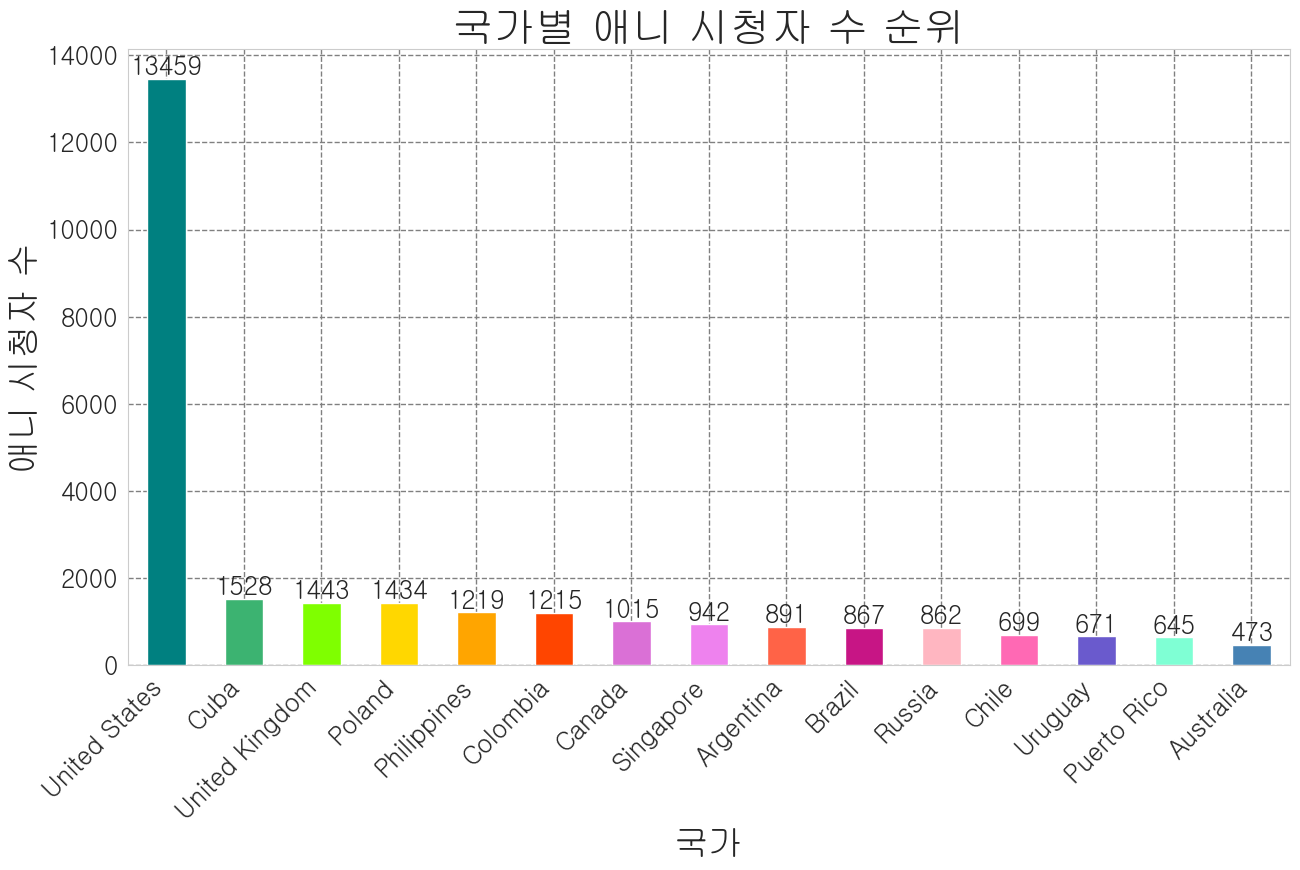

In [216]:
# 전체 애니 시청자 수 국가별 순위 시각화 총 135개국 중 상위 15개국
colors = [ '#008080', '#3CB371', '#7FFF00', '#FFD700', '#FFA500', '#FF4500', '#DA70D6', '#EE82EE', '#FF6347', '#C71585','#FFB6C1', '#FF69B4', '#6A5ACD', '#7FFFD4', '#4682B4']

Total_viewer_rank[:15].plot(kind='bar', color=colors,figsize=(15,8))
plt.title('국가별 애니 시청자 수 순위', fontsize=30)
plt.xlabel('국가', fontsize=25)
plt.ylabel('애니 시청자 수', fontsize= 25)
plt.xticks(rotation=45,ha='right',fontsize=18)
plt.yticks(fontsize=18)
plt.grid(axis='y', color='gray', linewidth=1, linestyle='--')
plt.grid(axis='x', color='gray',linewidth=1, linestyle='--')
# 막대에 숫자 표시
for i, value in enumerate(Total_viewer_rank[:15]):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=18)
plt.show()

## 2. 오타쿠 국가 분포도 시각화 + 단순 오타쿠 수와 인구 대비 오타쿠 표시 <hr>

In [217]:
# final_data 데이터 프레임에서 Completed가 500 이상인 값만 추출
final_data_500=final_data[final_data['Completed']>=500]
# 오타쿠 수 국가별 순위
final_data_500['country'].value_counts()

country
United States    988
Poland           118
Cuba             114
Philippines       87
Singapore         80
                ... 
Panama             1
Serbia             1
Malaysia           1
Latvia             1
Morocco            1
Name: count, Length: 82, dtype: int64

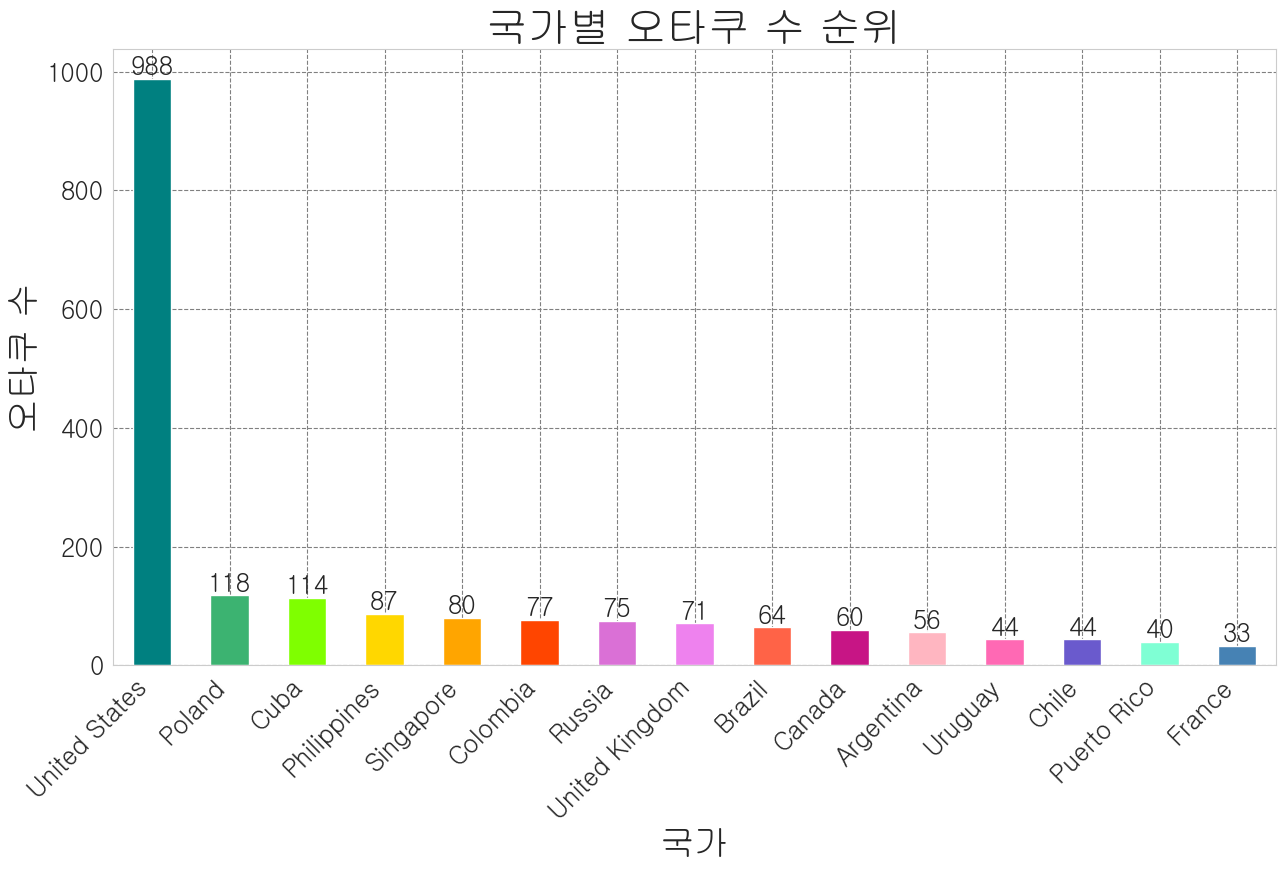

In [218]:
# 오타쿠 수 국가별 순위 시각화 총 135개국 중 상위 15개국
colors = [ '#008080', '#3CB371', '#7FFF00', '#FFD700', '#FFA500', '#FF4500', '#DA70D6', '#EE82EE', '#FF6347', '#C71585','#FFB6C1', '#FF69B4', '#6A5ACD', '#7FFFD4', '#4682B4']

Otaku_rank=final_data_500['country'].value_counts()
Otaku_rank[:15].plot(kind='bar',figsize=(15,8), color=colors)
plt.title('국가별 오타쿠 수 순위', fontsize=30)
plt.xlabel('국가', fontsize=25)
plt.ylabel('오타쿠 수', fontsize= 25)
plt.xticks(rotation=45,ha='right', fontsize=18)
plt.yticks(fontsize=18)
plt.grid(axis='y', color='gray',linestyle='--')
plt.grid(axis='x', color='gray',linestyle='--')
# 막대에 숫자 표시
for i, value in enumerate(Otaku_rank[:15]):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=18)
plt.show()


In [219]:
# 국가별 인구 데이터 로딩
population_file = '../Data/World_population.xlsx'
population = pd.read_excel(population_file)
# 필요없는 첫번째 행 삭제
population = population.iloc[1:]
# 조인하기 위해 컬럼명 country로 통일
population.rename(columns={'Country (or dependency)': 'country'}, inplace=True)
# country와 Population 컬럼만 남기고 나머지 컬럼 삭제
population = population[['country', 'Population']]
# 인구 데이터 확인
population.info()
population

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 1 to 234
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     234 non-null    object
 1   Population  234 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.8+ KB


,country,Population
1,India,1428627663
2,China,1425671352
3,United States,339996563
4,Indonesia,277534122
5,Pakistan,240485658
...,...,...
230,Montserrat,4386
231,Falkland Islands,3791
232,Niue,1935
233,Tokelau,1893


In [220]:
population
# Population 데이터 프레임과 Total_viewer_rank 데이터 프레임 조인
Total_viewer_rank = pd.merge(Total_viewer_rank, population, on='country', how='inner')
# final_data=pd.merge(final_data, population, on='country', how='inner')
# 인구 대비 수치 표시할 자료 컬럼 추가

In [221]:
Total_viewer_rank

,country,count,Population
0,United States,13459,339996563
1,Cuba,1528,11194449
2,United Kingdom,1443,67736802
3,Poland,1434,41026067
4,Philippines,1219,117337368
...,...,...,...
122,Montenegro,1,626485
123,Iraq,1,45504560
124,Oman,1,4644384
125,Armenia,1,2777970


In [222]:
# rate는 인구 대비 애니 시청자 수
rate = (Total_viewer_rank["count"]/Total_viewer_rank["Population"]*1000)
rate
Total_viewer_rank["Rate"] = rate
Total_viewer_rank.sort_values(by='Rate', ascending=False, inplace=True)

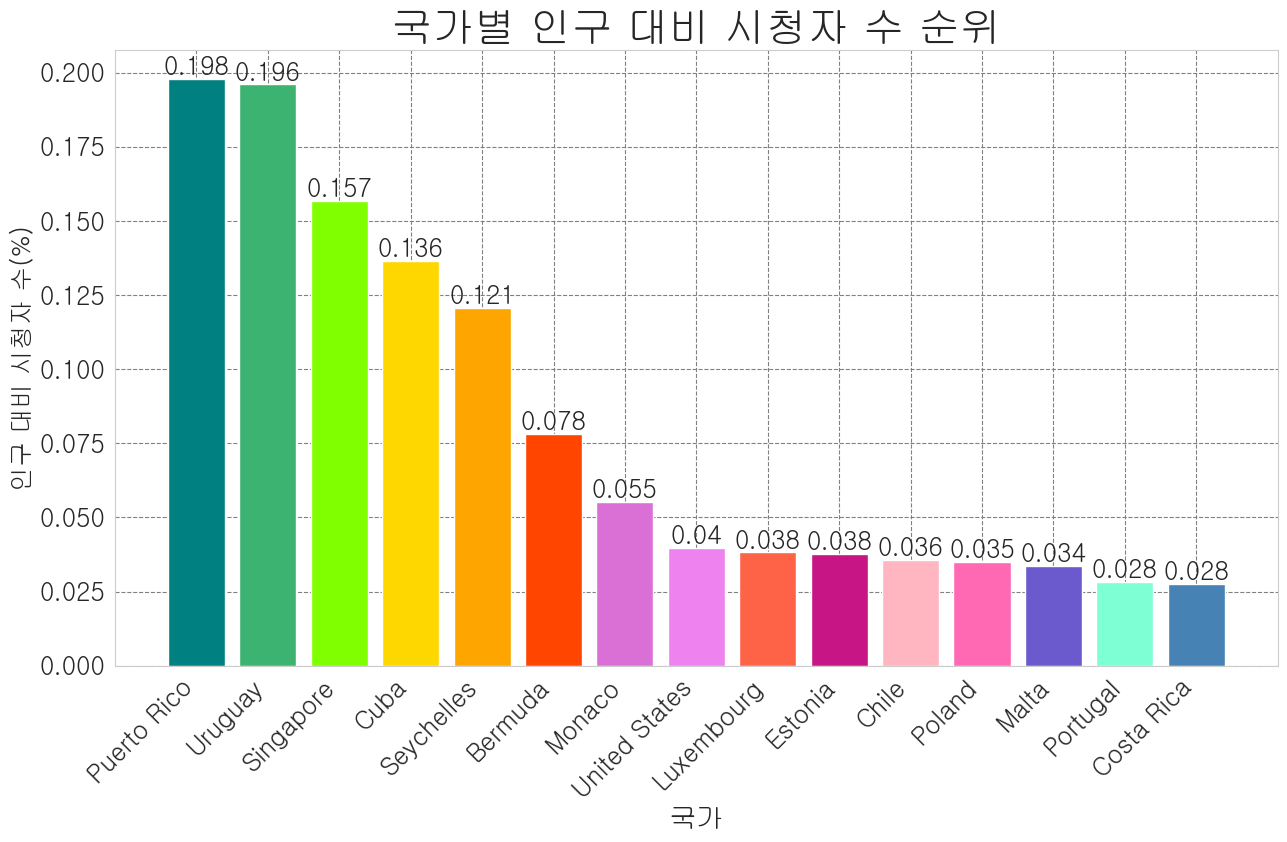

In [223]:
# 인구 대비 시청자 수 순위 그래프
# 색상 리스트 (15개 색상)
colors = [ '#008080', '#3CB371', '#7FFF00', '#FFD700', '#FFA500', '#FF4500', '#DA70D6', '#EE82EE', '#FF6347', '#C71585','#FFB6C1', '#FF69B4', '#6A5ACD', '#7FFFD4', '#4682B4']
plt.figure(figsize=(15, 8))
plt.bar(Total_viewer_rank["country"].head(15), Total_viewer_rank["Rate"].head(15), color=colors)
plt.title('국가별 인구 대비 시청자 수 순위', fontsize=30)
plt.xlabel('국가', fontsize=20, va='top')
plt.ylabel('인구 대비 시청자 수(%)', fontsize= 18)
plt.xticks(rotation=45,ha='right', fontweight='bold', fontsize=18)
plt.yticks(ha='right', fontweight='bold', fontsize=18)
plt.grid(axis='y', color='gray',linestyle='--')
plt.grid(axis='x', color='gray', linestyle='--')
# 막대에 숫자 표시
for i, value in enumerate(Total_viewer_rank['Rate'][:15]):
    plt.text(i, value, str(round(value,3)), ha='center', va='bottom', fontsize=18)
plt.show()

In [224]:
# # 인구 대비 시청자 수 순위 그래프
# # 색상 리스트 (15개 색상)
# colors = [ '#008080', '#3CB371', '#7FFF00', '#FFD700', '#FFA500', '#FF4500', '#DA70D6', '#EE82EE', '#FF6347', '#C71585','#FFB6C1', '#FF69B4', '#6A5ACD', '#7FFFD4', '#4682B4']
# plt.figure(figsize=(15, 8))
# plt.bar(Total_viewer_rank["country"].head(15), Total_viewer_rank["Rate"].head(15), color=colors)
# plt.title('국가별 인구 대비 시청자 수 순위', fontsize=30)
# plt.xlabel('국가', fontsize=20, va='top')
# plt.ylabel('인구 대비 시청자 수(%)', fontsize= 18)
# plt.xticks(rotation=45,ha='right', fontweight='bold', fontsize=18)
# plt.yticks(ha='right', fontweight='bold', fontsize=18)
# plt.grid(axis='y')
# plt.grid(axis='x')
# # 막대에 숫자 표시
# for i, value in enumerate(Total_viewer_rank['Rate'][:15]):
#     plt.text(i, value, str(round(value,3)), ha='center', va='bottom', fontsize=18)
# plt.show()

In [225]:
# Otaku_rank 와 population 조인
Otaku_rank = pd.merge(Otaku_rank, population, on='country', how='left')
Otaku_rank

,country,count,Population
0,United States,988,339996563.0
1,Poland,118,41026067.0
2,Cuba,114,11194449.0
3,Philippines,87,117337368.0
4,Singapore,80,6014723.0
...,...,...,...
77,Panama,1,4468087.0
78,Serbia,1,7149077.0
79,Malaysia,1,34308525.0
80,Latvia,1,1830211.0


In [226]:
# Otaku_rate는 인구 대비 오타쿠 수
Otaku_rate = (Otaku_rank["count"]/Otaku_rank["Population"]*1000)
# Otaku_rate 시리즈를 Otaku_rank 데이터 프레임에 컬럼으로 추가
Otaku_rank["Rate"] = Otaku_rate
Otaku_rank.sort_values(by='Rate', ascending=False, inplace=True)
Otaku_rank

,country,count,Population,Rate
67,Monaco,1,3.629700e+04,0.027550
4,Singapore,80,6.014723e+06,0.013301
11,Uruguay,44,3.423108e+06,0.012854
13,Puerto Rico,40,3.260314e+06,0.012269
2,Cuba,114,1.119445e+07,0.010184
...,...,...,...,...
65,Iran,1,8.917277e+07,0.000011
56,Pakistan,2,2.404857e+08,0.000008
53,India,3,1.428628e+09,0.000002
45,Czechia,4,NaN,NaN


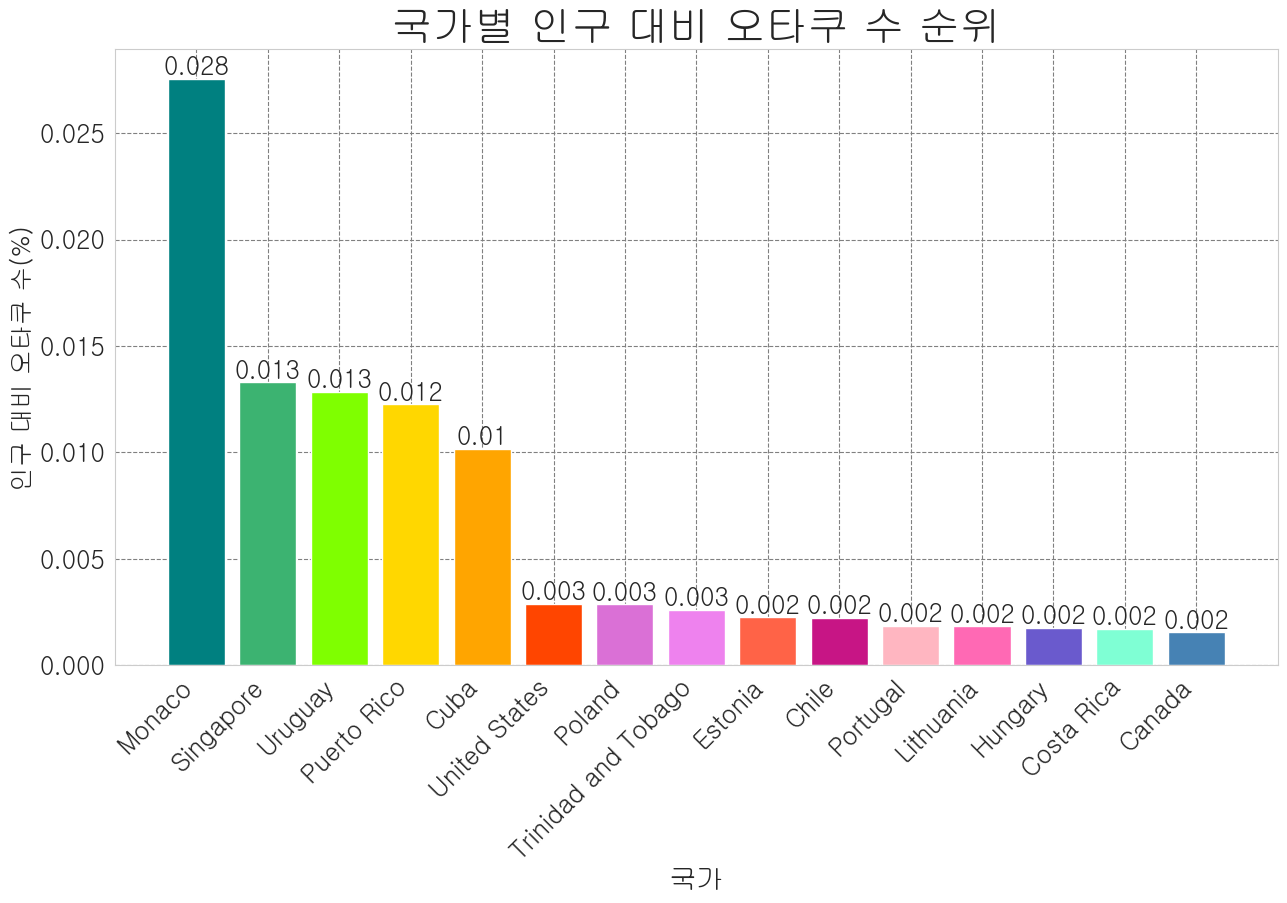

In [227]:
# 인구 대비 오타쿠 수 순위 그래프
# 색상 리스트 (15개 색상)
colors = [ '#008080', '#3CB371', '#7FFF00', '#FFD700', '#FFA500', '#FF4500', '#DA70D6', '#EE82EE', '#FF6347', '#C71585','#FFB6C1', '#FF69B4', '#6A5ACD', '#7FFFD4', '#4682B4']
plt.figure(figsize=(15, 8))
plt.bar(Otaku_rank["country"].head(15), Otaku_rank["Rate"].head(15), color=colors)
plt.title('국가별 인구 대비 오타쿠 수 순위', fontsize=30)
plt.xlabel('국가', fontsize=20, va='top')
plt.ylabel('인구 대비 오타쿠 수(%)', fontsize= 18)
plt.xticks(rotation=45,ha='right', fontweight='bold', fontsize=18)
plt.yticks(ha='right', fontweight='bold', fontsize=18)
plt.grid(axis='y', color='gray', linestyle='--')
plt.grid(axis='x', color='gray', linestyle='--')
# 막대에 숫자 표시
for i, value in enumerate(Otaku_rank['Rate'][:15]):
    plt.text(i, value, str(round(value,3)), ha='center', va='bottom', fontsize=18)
plt.show()

### - 일본 수출 데이터 로딩 <hr>

In [228]:
Japan_exports_file = '../Data/Japan_exports_by_country.xlsx'
Japan_exports = pd.read_excel(Japan_exports_file)
# Japan_exports 데이터 프레임의 Value 컬럼에서 'B', 'M', 'K' 문자열 숫자로 바꿔주는 과정
for v in Japan_exports['Value']:
    if 'B' in v:
        Japan_exports['Value'] = Japan_exports['Value'].str.replace('B', '0000000')
    elif 'M' in v:
        Japan_exports['Value'] = Japan_exports['Value'].str.replace('M', '0000')
    elif 'K' in v:
        Japan_exports['Value'] = Japan_exports['Value'].str.replace('K', '0')

Japan_exports

,Japan Exports By Country,Value,Year
0,China,$144.540000000,2022
1,United States,$139.770000000,2022
2,South Korea,$54.040000000,2022
3,Hong Kong,$33.140000000,2022
4,Thailand,$32.450000000,2022
...,...,...,...
191,Equatorial Guinea,$480.310,2022
192,Andorra,$440.150,2022
193,Eritrea,$399.620,2022
194,Greenland,$52.850,2022


In [229]:
# Value 컬럼에서 '.' 문자열을 제거하는 과정
for v in  Japan_exports['Value']:
    if '.' in v:
        Japan_exports['Value'] = Japan_exports['Value'].str.replace('.', '')
        # Japan_exports['Value'] = Japan_exports['Value'].astype(int)
Japan_exports, Japan_exports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Japan Exports By Country  196 non-null    object
 1   Value                     196 non-null    object
 2   Year                      196 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 4.7+ KB


(    Japan Exports By Country          Value  Year
 0                      China  $144540000000  2022
 1              United States  $139770000000  2022
 2                South Korea   $54040000000  2022
 3                  Hong Kong   $33140000000  2022
 4                   Thailand   $32450000000  2022
 ..                       ...            ...   ...
 191        Equatorial Guinea        $480310  2022
 192                  Andorra        $440150  2022
 193                  Eritrea        $399620  2022
 194                Greenland         $52850  2022
 195            Faroe Islands         $48560  2022
 
 [196 rows x 3 columns],
 None)

In [230]:
# $ 문자열 제거와 숫자로 바꾸기
for v in Japan_exports['Value']:
    if '$' in v:
        Japan_exports['Value'] = Japan_exports['Value'].str.replace('$', '')

# Value값 데이터 타입 float로 변환
Japan_exports['Value'] = Japan_exports['Value'].astype(float)
# 첫번째 컬럼명을 'country'으로 변경
Japan_exports.rename(columns={'Japan Exports By Country': 'country'}, inplace=True)
Japan_exports

,country,Value,Year
0,China,1.445400e+11,2022
1,United States,1.397700e+11,2022
2,South Korea,5.404000e+10,2022
3,Hong Kong,3.314000e+10,2022
4,Thailand,3.245000e+10,2022
...,...,...,...
191,Equatorial Guinea,4.803100e+05,2022
192,Andorra,4.401500e+05,2022
193,Eritrea,3.996200e+05,2022
194,Greenland,5.285000e+04,2022


In [231]:
Total_viewer_rank.sort_values(by='count',ascending=False, inplace=True)
Total_viewer_rank

,country,count,Population,Rate
0,United States,13459,339996563,0.039586
1,Cuba,1528,11194449,0.136496
2,United Kingdom,1443,67736802,0.021303
3,Poland,1434,41026067,0.034953
4,Philippines,1219,117337368,0.010389
...,...,...,...,...
109,Libya,1,6888388,0.000145
114,Kyrgyzstan,1,6735347,0.000148
112,Kuwait,1,4310108,0.000232
124,Oman,1,4644384,0.000215


In [232]:
# Total_viewer_rank 데이터 프레임과 Japan_exports 데이터 프레임을 조인
Total_viewer_rank = pd.merge(Total_viewer_rank, Japan_exports, on='country')
Total_viewer_rank


,country,count,Population,Rate,Value,Year
0,United States,13459,339996563,0.039586,1.397700e+11,2022
1,Cuba,1528,11194449,0.136496,1.553000e+07,2022
2,United Kingdom,1443,67736802,0.021303,1.103000e+10,2022
3,Poland,1434,41026067,0.034953,4.180000e+09,2022
4,Philippines,1219,117337368,0.010389,1.215000e+10,2022
...,...,...,...,...,...,...
115,Libya,1,6888388,0.000145,4.418000e+07,2022
116,Kyrgyzstan,1,6735347,0.000148,3.656000e+07,2022
117,Kuwait,1,4310108,0.000232,1.580000e+09,2022
118,Oman,1,4644384,0.000215,1.210000e+09,2022


In [233]:
# Total_viewer_rank 데이터 프레임의 count와 Value의 상관관계
correlation = Total_viewer_rank['count'].corr(Total_viewer_rank['Value'])
correlation

0.6258927766915089

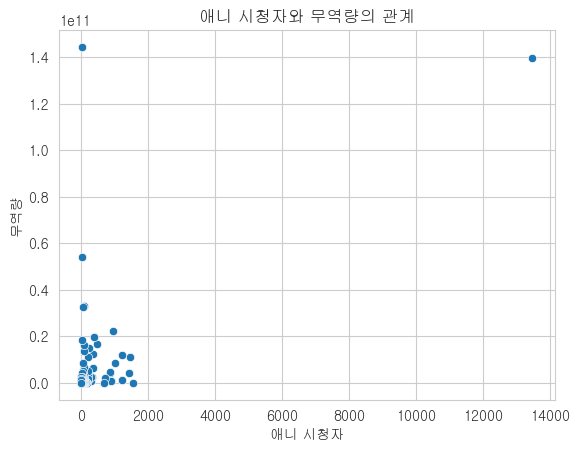

In [234]:
# correlation 시각화
import seaborn as sns

# 산점도 그리기
sns.scatterplot(x='count', y='Value', data=Total_viewer_rank)

# 그래프 제목 추가
plt.title('애니 시청자와 무역량의 관계')

# x축과 y축 라벨 추가
plt.xlabel('애니 시청자')
plt.ylabel('무역량')

# 그래프 보여주기
plt.show()

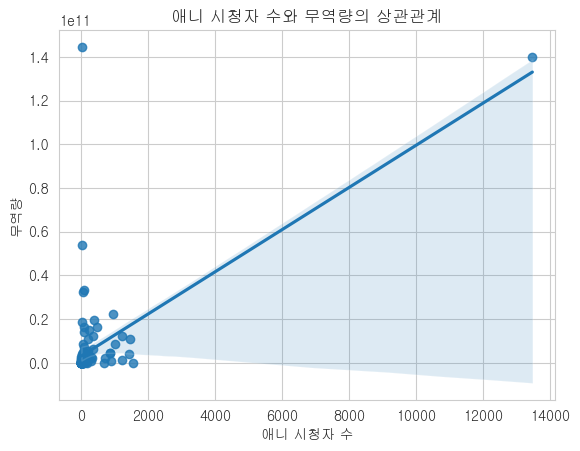

In [235]:
# 회귀선이 포함된 산점도
sns.regplot(x='count', y='Value', data=Total_viewer_rank)

# 그래프 제목 및 라벨 추가
plt.title('애니 시청자 수와 무역량의 상관관계')
plt.xlabel('애니 시청자 수')
plt.ylabel('무역량')

# 그래프 보여주기
plt.show()

In [236]:
# 상관행렬 계산
correlation_matrix = Total_viewer_rank[['count', 'Value','Rate']].corr()
correlation_matrix

,count,Value,Rate
count,1.000000,0.625893,0.202080
Value,0.625893,1.000000,0.043794
Rate,0.202080,0.043794,1.000000


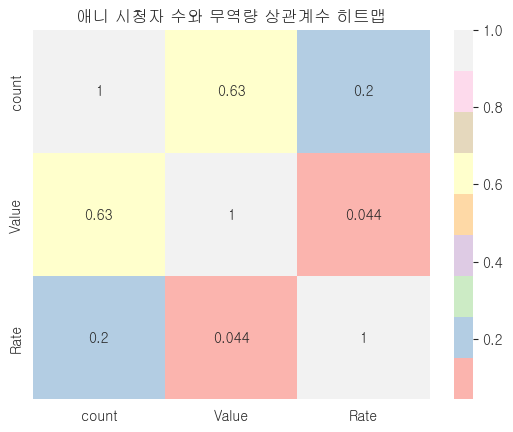

In [237]:
# 히트맵 그리기
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1')

# 그래프 제목 추가
plt.title('애니 시청자 수와 무역량 상관계수 히트맵')

# 그래프 보여주기
plt.show()


In [238]:
# gi